# Lab Assignment 1: Exploring Table Data

By Nick Chao & Carter Koehler

## 1. Business Understanding

This dataset contains detailed specifications, release dates and prices of Intel CPUs. The list of features includes: number of cores and threads, base frequencies, cache, bus speeds, maximum temperatures, maximum memory size, max number of memory channels, as well as a number of additional metadata.

The main inspiration for this dataset is to see how performance over price evolved over time as well as to examine the general computing power of Intel CPUs. This data was found at https://www.kaggle.com/trion129/intel-cpus-eda/ and as per the acknowledgement states, "The data given here belongs mainly to Intel, Game-Debate, and the companies involved in producing the part. I do not own the data I uploaded it solely for informative purposes, under their original license."

One question of interest to ask is whether we can predict when an active processor's status will change to End of Life or End of Interactive Support. This information is valuable to anyone who might be looking into purchasing one of Intel's CPUs. The benefit being that most consumers would want a product that will be supported by the manufacturer for a long time. Furthermore, Intel's competitors would have a huge competitive advantage as they can use this data, supplemented with market data to strategically figure out when to announce or release their own products. 

### Measure of Success

Now to discuss what a successful prediction would mean. As most cases, we want our machine learning algorithm to be accurate most of the time. Since our accuracy is dependent on how close our prediction is rather than a simple hit or miss situation, we should consider our measure of success based on being correct within a specific margin of error.

Because accuracy is determined by correctly "guessing" the correct timeframe when a specific product's status changes to End of Life or to End of Interactive Support, we must define what a timeframe is. To simplify things, we divide our timeframes into yearly quarters. However, we must remember that the success of this predictive model is if it becomes beneficial to third party users. In this case we must establish an appropriate margin of error that fits this requirement.

We decided that one quarter as our margin of error would be appropriate because at maximum, the error would be six months. We felt that this timeframe is accurate enough for consumers to consider this data useful in their product research. The further the margin of error, the less reliable and useful the predictive model becomes. 

For example, if our machine learning algorithm predicted that product A's status would change to End of Life in Q4 2020, but it was actually Q1 2021 then we would judge this to still be successful and useful to users. However, if the status changed to End of Life in Q2 2021 then we would consider this a failed prediction. 

The last thing to discuss is how often our machine learning algorithm needs to successfully predict the timeframe (within the margin of error) to be useful. Our judgement says that our success rate should be at least 50% all of the time. In addition, it should be accurate within the margin of error 70% of the time, and accurate within two margins or error 90% of the time. Accuracy outside these limits would make this predictive algorithm worthless to users.

----------------------------------------------------------------------------------------------------------------------
Dataset: Intel_CPUs EDA URL: https://www.kaggle.com/trion129/intel-cpus-eda/

Question of Interest: Which Processors are close to End of Life and End of Interactive Support Status?


## 2. Data Understanding

### 2.1 Data Description

In [51]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
import sys

%matplotlib inline

from matplotlib import rcParams

rcParams['figure.figsize'] = 8,7

Here we have the potentially less interesting part of the analysis, the humble data-munging.

Some of what we do below is truly uninteresting, pulling numbers out of strings, converting "yes" to 1 and "no" to 0, etc., but there are some interesting choices to explore. For example, what to do about launch date.

There are a couple of different ways wee could go with this, just keeping the year, having separate features for year and quarter, putting everything on a continuum. Here we choose to turn everything into a float. This will make it harder to do things like group by time-period, but we gain the advantage of being able to sensibly plot things along a time axis and potential run regressions with launch as an explanatory variable.

### 2.2 Data Cleaning

In [52]:
data_dir = os.path.join(os.getcwd(), "..", "data")

cpu_data = pd.read_csv(os.path.join(data_dir, "Intel_CPUs.csv"))

# replace status names to numerical indicators
# cpu_data.Status.replace(to_replace = ['Announced', 'Launched', 'End of Interactive Support', 'End of Life'],
#                         value = range(1,5), inplace = True)

# replace launch_date to a measurable unit 
cpu_data.Launch_Date.replace(to_replace = ['Q1\'00', 'Q2\'00', 'Q3\'00', 'Q4\'00', 'Q1\'01', 'Q2\'01', 'Q3\'01', 'Q4\'01', 'Q1\'02', 'Q2\'02', 'Q3\'02', 'Q4\'02', 'Q1\'03', 'Q2\'03', 'Q3\'03', 'Q4\'03', 'Q1\'04', 'Q2\'04', 'Q3\'04', 'Q4\'04', 'Q1\'05', 'Q2\'05', 'Q3\'05', 'Q4\'05', 'Q1\'06', 'Q2\'06', 'Q3\'06', 'Q4\'06', 'Q1\'07', 'Q2\'07', 'Q3\'07', 'Q4\'07', 'Q1\'08', 'Q2\'08', 'Q3\'08', 'Q4\'08', 'Q1\'09', 'Q2\'09', 'Q3\'09', 'Q4\'09', 'Q1\'10', 'Q2\'10', 'Q3\'10', 'Q4\'10', 'Q1\'11', 'Q2\'11', 'Q3\'11', 'Q4\'11', 'Q1\'12', 'Q2\'12', 'Q3\'12', 'Q4\'12', 'Q1\'13', 'Q2\'13', 'Q3\'13', 'Q4\'13', 'Q1\'14', 'Q2\'14', 'Q3\'14', 'Q4\'14', 'Q1\'15', 'Q2\'15', 'Q3\'15', 'Q4\'15', 'Q1\'16', 'Q2\'16', 'Q3\'16', 'Q4\'16', 'Q1\'17', 'Q2\'17', 'Q3\'17', 'Q4\'17', 'Q1\'18', 'Q2\'18', 'Q3\'18', 'Q4\'18', 'Q1 \'15', '04\'16', 'Q1\'99', 'Q2\'99'],
                    value = [*np.arange(1,20,0.25), 15.75, 17.0, 0.0, 0.25], inplace = True)

In [53]:
default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 99

display(cpu_data.head())

pd.options.display.max_columns = default_columns

Product_Collection Vertical_Segment  \
0  7th Generation Intel® Core™ i7 Processors           Mobile   
1  8th Generation Intel® Core™ i5 Processors           Mobile   
2  8th Generation Intel® Core™ i7 Processors           Mobile   
3           Intel® Core™ X-series Processors          Desktop   
4  7th Generation Intel® Core™ i5 Processors           Mobile   

  Processor_Number       Status  Launch_Date Lithography  \
0          i7-7Y75     Launched         17.5       14 nm   
1         i5-8250U     Launched         18.5       14 nm   
2         i7-8550U     Launched         18.5       14 nm   
3          i7-3820  End of Life         13.0       32 nm   
4          i5-7Y57     Launched         18.0       14 nm   

  Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
0                   $393.00             2            4.0   
1                   $297.00             4            8.0   
2                   $409.00             4            8.0   
3                   $305.00             4            8.0   
4                   $281.00             2            4.0   

  Processor_Base_Frequency Max_Turbo_Frequency             Cache    Bus_Speed  \
0                 1.30 GHz            3.60 GHz   4 MB SmartCache   4 GT/s OPI   
1                 1.60 GHz            3.40 GHz   6 MB SmartCache   4 GT/s OPI   
2                 1.80 GHz            4.00 GHz   8 MB SmartCache   4 GT/s OPI   
3                 3.60 GHz            3.80 GHz  10 MB SmartCache  5 GT/s DMI2   
4                 1.20 GHz            3.30 GHz   4 MB SmartCache   4 GT/s OPI   

     TDP Embedded_Options_Available Conflict_Free Max_Memory_Size  \
0  4.5 W                         No           Yes           16 GB   
1   15 W                         No           Yes           32 GB   
2   15 W                         No           Yes           32 GB   
3  130 W                         No           NaN        64.23 GB   
4  4.5 W                         No           Yes           16 GB   

              Memory_Types  Max_nb_of_Memory_Channels Max_Memory_Bandwidth  \
0  LPDDR3-1866, DDR3L-1600                        2.0            29.8 GB/s   
1   DDR4-2400, LPDDR3-2133                        2.0            34.1 GB/s   
2   DDR4-2400, LPDDR3-2133                        2.0            34.1 GB/s   
3      DDR3 1066/1333/1600                        4.0            51.2 GB/s   
4  LPDDR3-1866, DDR3L-1600                        2.0            29.8 GB/s   

  ECC_Memory_Supported  Processor_Graphics_ Graphics_Base_Frequency  \
0                   No                  NaN                 300 MHz   
1                   No                  NaN                 300 MHz   
2                   No                  NaN                 300 MHz   
3                   No                  NaN                     NaN   
4                   No                  NaN                 300 MHz   

  Graphics_Max_Dynamic_Frequency Graphics_Video_Max_Memory  Graphics_Output  \
0                       1.05 GHz                     16 GB  eDP/DP/HDMI/DVI   
1                       1.10 GHz                     32 GB  eDP/DP/HDMI/DVI   
2                       1.15 GHz                     32 GB  eDP/DP/HDMI/DVI   
3                            NaN                       NaN              NaN   
4                        950 MHz                     16 GB  eDP/DP/HDMI/DVI   

   Support_4k Max_Resolution_HDMI Max_Resolution_DP  \
0         NaN      4096x2304@24Hz    3840x2160@60Hz   
1         NaN      4096x2304@24Hz    4096x2304@60Hz   
2         NaN      4096x2304@24Hz    4096x2304@60Hz   
3         NaN                 NaN               NaN   
4         NaN      4096x2304@24Hz    3840x2160@60Hz   

  Max_Resolution_eDP_Integrated_Flat_Panel DirectX_Support  OpenGL_Support  \
0                           3840x2160@60Hz              12             NaN   
1                           4096x2304@60Hz              12             NaN   
2                           4096x2304@60Hz              12             NaN 

In [54]:
# find the data summary
cpu_data.describe()

Launch_Date  nb_of_Cores  nb_of_Threads  Max_nb_of_Memory_Channels  \
count  1871.000000  2283.000000    1427.000000                1414.000000   
mean     13.124399     4.066579       8.728101                   2.615276   
std       3.729452     6.329884       9.132518                   1.470327   
min       0.000000     1.000000       1.000000                   1.000000   
25%      11.000000     1.000000       4.000000                   2.000000   
50%      14.000000     2.000000       4.000000                   2.000000   
75%      16.000000     4.000000       8.000000                   3.000000   
max      18.500000    72.000000      56.000000                  16.000000   

       Processor_Graphics_  Support_4k  OpenGL_Support  \
count                  0.0         0.0             0.0   
mean                   NaN         NaN             NaN   
std                    NaN         NaN             NaN   
min                    NaN         NaN             NaN   
25%                    NaN         NaN             NaN   
50%                    NaN         NaN             NaN   
75%                    NaN         NaN             NaN   
max                    NaN         NaN             NaN   

       Max_nb_of_PCI_Express_Lanes  
count                  1179.000000  
mean                     20.399491  
std                      12.868963  
min                       0.000000  
25%                      16.000000  
50%                      16.000000  
75%                      32.000000  
max                      48.000000

In [55]:
# find the data type
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 45 columns):
Product_Collection                          2283 non-null object
Vertical_Segment                            2283 non-null object
Processor_Number                            1934 non-null object
Status                                      2283 non-null object
Launch_Date                                 1871 non-null float64
Lithography                                 2212 non-null object
Recommended_Customer_Price                  1301 non-null object
nb_of_Cores                                 2283 non-null int64
nb_of_Threads                               1427 non-null float64
Processor_Base_Frequency                    2265 non-null object
Max_Turbo_Frequency                         914 non-null object
Cache                                       2271 non-null object
Bus_Speed                                   1989 non-null object
TDP                                         2216

In [56]:
data_features = ['Product_Collection', 'Vertical_Segment', 'Processor_Number', 'Recommended_Customer_Price', 'nb_of_Cores', 'nb_of_Threads', 'Processor_Base_Frequency', 'Cache', 'Bus_Speed', 'TDP', 'Embedded_Options_Available', 'Max_Memory_Size', 'Max_nb_of_Memory_Channels', 'Instruction_Set', 'Intel_Hyper_Threading_Technology_', 'Intel_64_', 'Execute_Disable_Bit', 'Status', 'Launch_Date']

# picking which features are going to be relevant to the analysis

cpu_df = cpu_data.filter(data_features)
cpu_df.dropna(axis=0, subset=['Processor_Number'], inplace=True)

# indexing the dataset by processor number

cpu_df.index = cpu_df.Processor_Number

# dropping anything that doesn't have an identifier

cpu_df.drop('Processor_Number', inplace=True)

In [57]:
# reducing collection variable down to just product line 

cpu_df.Product_Collection.replace(
    to_replace=['.*Core.*', '.*X-series.*', '.*Celeron.*', '.*Pentium.*', '.*Quark.*', '.*Core. [mM].*', '.*Atom.*', '.*Itanium.*', '.*Xeon.*'], 
    value=['Core', 'X-series', 'Celeron', 'Pentium', 'Quark', 'm', 'Atom', 'Itanium', 'Xeon'], regex=True, inplace=True)

In [58]:
# encoding categorical variables as binary

cpu_df.replace(['Yes', 'No'], [1,0], inplace=True)

In [59]:
# cleaning up the price variable

def process_price(raw_price):
    if isinstance(raw_price, float):
        return raw_price
    elif '-' in raw_price:
        split_price = [float(price.strip(' ').strip('$').replace(',', '')) for price in raw_price.split('-')]
        return np.mean(split_price)
    else:
        return float(raw_price.strip('$').replace(',',''))

for entry in cpu_df.Recommended_Customer_Price:
    entry = process_price(entry)
    
cpu_df['Recommended_Customer_Price'] = cpu_df['Recommended_Customer_Price'].apply(process_price)

In [60]:
import re

# turning strings of numbers into actual numbers

def get_numbers(word):
    if isinstance(word, str):
        return float(re.findall('[\d]*[.]?[\d]+?', word)[0])
    else:
        return word
    
def process_computer_stats(stat):
    if isinstance(stat, float):
        return stat
    elif 'K' in stat:
        factor = 1000
    elif 'M' in stat:
        factor = 10**6
    elif 'G' in stat:
        factor = 10**9
    elif 'T' in stat:
        factor = 10**12
    else:
        factor = 1
       
    return factor * get_numbers(stat)

for column in ['TDP', 'Max_Memory_Size', 'Cache', 'Processor_Base_Frequency', 'Bus_Speed']:
    cpu_df[column] = cpu_df[column].apply(process_computer_stats)

In [61]:
# look upon my works, ye Mighty

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 99

display(cpu_df)

pd.options.display.max_columns = default_columns

Product_Collection Vertical_Segment Processor_Number  \
Processor_Number                                                        
i7-7Y75                        Core           Mobile          i7-7Y75   
i5-8250U                       Core           Mobile         i5-8250U   
i7-8550U                       Core           Mobile         i7-8550U   
i7-3820                        Core          Desktop          i7-3820   
i5-7Y57                        Core           Mobile          i5-7Y57   
3205U                       Celeron           Mobile            3205U   
N2805                       Celeron           Mobile            N2805   
J1750                       Celeron          Desktop            J1750   
G1610                       Celeron          Desktop            G1610   
518                         Pentium           Mobile              518   
2020M                       Pentium           Mobile            2020M   
773                         Pentium           Mobile              773   
3825U                       Pentium           Mobile            3825U   
4405U                       Pentium           Mobile            4405U   
N3710                       Pentium           Mobile            N3710   
C1000                         Quark         Embedded            C1000   
J2850                       Pentium          Desktop            J2850   
J2900                       Pentium          Desktop            J2900   
J3710                       Pentium          Desktop            J3710   
J4205                       Pentium          Desktop            J4205   
N3700                       Pentium           Mobile            N3700   
N3510                       Pentium           Mobile            N3510   
N3520                       Pentium           Mobile            N3520   
N3530                       Pentium           Mobile            N3530   
N3540                       Pentium           Mobile            N3540   
N4200                       Pentium           Mobile            N4200   
4405Y                       Pentium           Mobile            4405Y   
4415Y                       Pentium           Mobile            4415Y   
4410Y                       Pentium           Mobile            4410Y   
4415U                       Pentium           Mobile            4415U   
...                             ...              ...              ...   
i5-6440EQ                      Core         Embedded        i5-6440EQ   
i5-6400T                       Core          Desktop         i5-6400T   
i5-6400                        Core          Desktop          i5-6400   
i5-6402P                       Core          Desktop         i5-6402P   
i5-6500TE                      Core         Embedded        i5-6500TE   
i5-6500T                       Core          Desktop         i5-6500T   
i5-6500                        Core          Desktop          i5-6500   
i5-6585R                       Core          Desktop         i5-6585R   
i5-6600T                       Core          Desktop         i5-6600T   
i5-6600K                       Core          Desktop         i5-6600K   
i5-6685R                       Core          Desktop         i5-6685R   
i5-6600                        Core          Desktop          i5-6600   
i3-6006U                       Core           Mobile         i3-6006U   
i3-6100TE                      Core         Embedded        i3-6100TE   
i3-6100T                       Core          Desktop         i3-6100T   
i3-6100                        Core          Desktop          i3-6100   
i3-6167U                       Core           Mobile         i3-6167U   
i3-6157U                       Core           Mobile         i3-6157U   
i3-6102E                       Core         Embedded         i3-6102E   
i3-6100U                       Core           Mobile         i3-6100U   
i3-6100H                       Core           Mobile         i3-6100H   
i3-6320                        Core          Desktop          i3-6320   
i3

### 2.3 Missing Values

Alright, it's time now to start handling our missing data. First, let's try to figure out what we're dealing with.

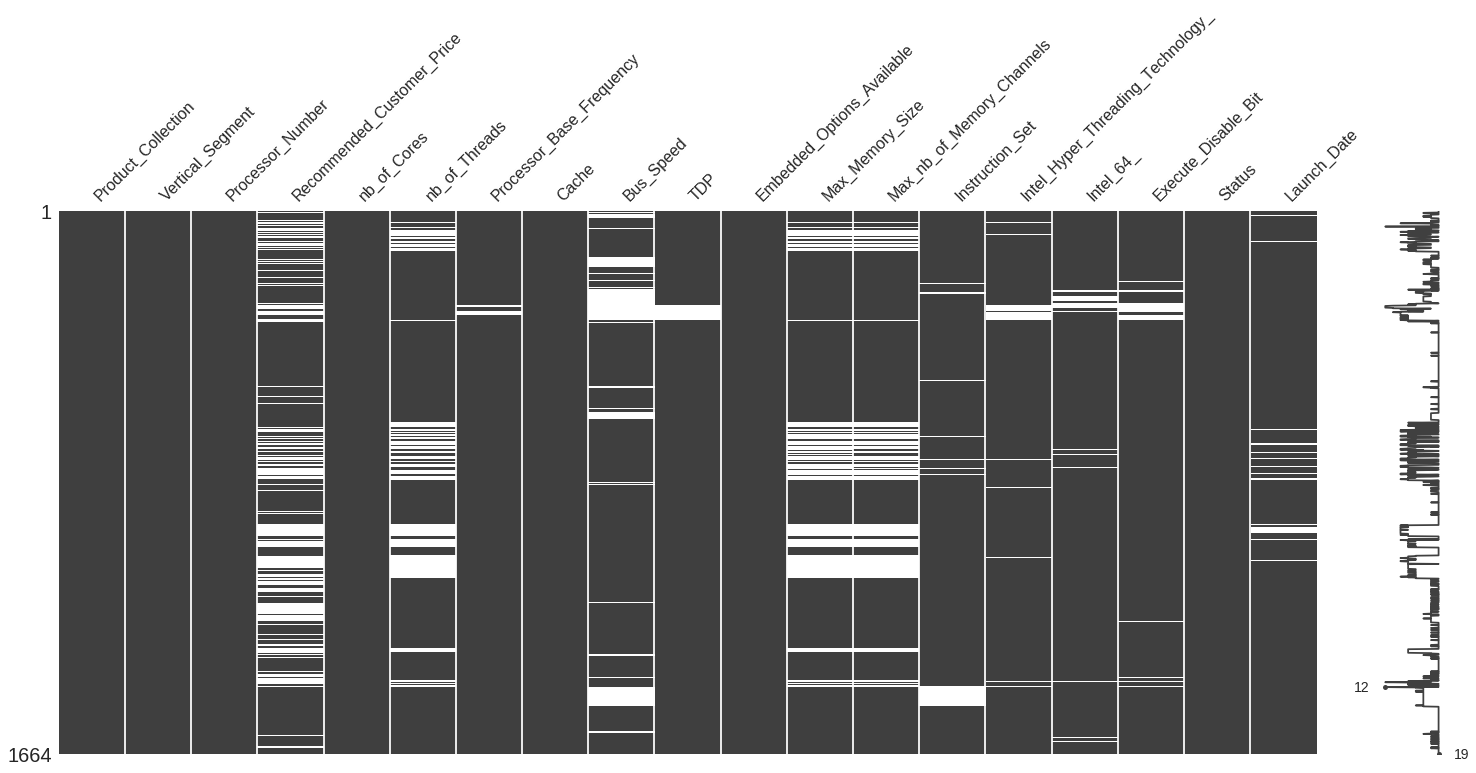

In [90]:
import missingno as msno

msno.matrix(cpu_df)

It appears that a large number of datapoints are missing several features together. Thread number, memory channels, and memory size appear to be missing in tandem a lot. However, as explanatory variables, those are going to be less important to our analysis than something like number of cores, clock speed, or cache. 

One somewhat worrying aspect of this data is that price is missing with very high frequency. This is particularly concerning as that is one value that would be helpful to predict for future use, and the way that price correlates with the other features can tell a lot about demand for CPUs and how they are being used. This missing price data could be due to the fact that it is a "recommended" price, not an actual sale price. Regardless, this may lead to a somewhat messy imputation and/or dropping process later on.

Something else, like missing thread data, could be a result of nearby data being closely correlated. In this case, for example, numbers of cores and threads often change closely in parallel. And something like bus speed or number of memory channels may just not be all that important in the marketing of a CPU. 

In [62]:
cpu_df.info()

cpu_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, i7-7Y75 to i7-5557U
Data columns (total 19 columns):
Product_Collection                   1934 non-null object
Vertical_Segment                     1934 non-null object
Processor_Number                     1934 non-null object
Recommended_Customer_Price           1291 non-null float64
nb_of_Cores                          1934 non-null int64
nb_of_Threads                        1427 non-null float64
Processor_Base_Frequency             1916 non-null float64
Cache                                1932 non-null float64
Bus_Speed                            1641 non-null float64
TDP                                  1886 non-null float64
Embedded_Options_Available           1933 non-null float64
Max_Memory_Size                      1403 non-null float64
Max_nb_of_Memory_Channels            1414 non-null float64
Instruction_Set                      1842 non-null object
Intel_Hyper_Threading_Technology_    1846 non-null float64
Intel_64_

Recommended_Customer_Price  nb_of_Cores  nb_of_Threads  \
count                 1291.000000  1934.000000    1427.000000   
mean                   841.621890     4.617373       8.728101   
std                   1443.550711     6.731525       9.132518   
min                      2.540000     1.000000       1.000000   
25%                    161.000000     2.000000       4.000000   
50%                    299.500000     2.000000       4.000000   
75%                    685.500000     4.000000       8.000000   
max                  13011.000000    72.000000      56.000000   

       Processor_Base_Frequency         Cache     Bus_Speed          TDP  \
count              1.916000e+03  1.932000e+03  1.641000e+03  1886.000000   
mean               2.341611e+09  8.183095e+06  1.807245e+09    62.541676   
std                7.135526e+08  9.621049e+06  2.876985e+09    46.277893   
min                3.200000e+07  8.000000e+03  0.000000e+00     0.000000   
25%                1.800000e+09  2.000000e+06  5.000000e+06    28.000000   
50%                2.300000e+09  4.000000e+06  5.330000e+08    51.000000   
75%                2.900000e+09  8.000000e+06  1.333000e+09    89.500000   
max                4.300000e+09  6.000000e+07  9.600000e+09   300.000000   

       Embedded_Options_Available  Max_Memory_Size  Max_nb_of_Memory_Channels  \
count                 1933.000000     1.403000e+03                1414.000000   
mean                     0.220900     2.658195e+11                   2.615276   
std                      0.414961     5.436237e+11                   1.470327   
min                      0.000000     1.000000e+09                   1.000000   
25%                      0.000000     1.600000e+10                   2.000000   
50%                      0.000000     3.200000e+10                   2.000000   
75%                      0.000000     2.560000e+11                   3.000000   
max                      1.000000     4.100000e+12                  16.000000   

       Intel_Hyper_Threading_Technology_    Intel_64_  Execute_Disable_Bit  \
count                        1846.000000  1834.000000          1846.000000   
mean                            0.579632     0.920938             0.973456   
std                             0.493752     0.269909             0.160790   
min                             0.000000     0.000000             0.000000   
25%                             0.000000     1.000000             1.000000   
50%                             1.000000     1.000000             1.000000   
75%                             1.000000     1.000000             1.000000   
max                             1.000000     1.000000             1.000000   

       Launch_Date  
count  1811.000000  
mean     13.440502  
std       3.335035  
min       4.250000  
25%      11.000000  
50%      14.250000  
75%      16.000000  
max      18.500000

Let's start by breaking things up into classes that seem to make sense. Product Collection seems like a decent place to start, as they are designed to be similar within their groups by Intel when they build them.

In [63]:
cpu_grp = cpu_df.groupby(by=['Product_Collection'])

display(cpu_grp.Product_Collection.count())

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Product_Collection
Atom       142
Celeron    208
Core       691
Itanium     27
Pentium    233
Quark       11
Xeon       622
Name: Product_Collection, dtype: int64

Bus_Speed                                           \
                       count          mean           std          min   
Product_Collection                                                      
Atom                    45.0  8.718222e+08  1.015365e+09    2500000.0   
Celeron                170.0  4.265000e+08  6.932589e+08          0.0   
Core                   667.0  5.555112e+08  1.188919e+09          0.0   
Itanium                 27.0  3.081407e+09  2.711326e+09  533000000.0   
Pentium                212.0  4.793892e+08  6.574014e+08          0.0   
Quark                    0.0           NaN           NaN          NaN   
Xeon                   520.0  4.420380e+09  3.632182e+09          0.0   

                                                                           \
                            25%           50%           75%           max   
Product_Collection                                                          
Atom                  2500000.0  5.330000e+08  2.500000e+09  2.500000e+09   
Celeron               5000000.0  4.000000e+08  5.330000e+08  4.000000e+09   
Core                  5000000.0  5.000000e+06  6.670000e+08  6.400000e+09   
Itanium             533000000.0  6.670000e+08  6.400000e+09  6.400000e+09   
Pentium               5000000.0  4.665000e+08  8.000000e+08  4.000000e+09   
Quark                       NaN           NaN           NaN           NaN   
Xeon                667000000.0  5.800000e+09  8.000000e+09  9.600000e+09   

                    Cache                                                     \
                    count          mean           std        min         25%   
Product_Collection                                                             
Atom                142.0  2.373352e+06  3.599069e+06   512000.0    512000.0   
Celeron             208.0  1.330231e+06  6.783038e+05   256000.0   1000000.0   
Core                691.0  5.003329e+06  2.908982e+06  1000000.0   3000000.0   
Itanium              27.0  1.948148e+07  7.717963e+06  6000000.0  12000000.0   
Pentium             233.0  2.223176e+06  9.834730e+05  1000000.0   2000000.0   
Quark                 9.0  1.511111e+04  2.666667e+03     8000.0     16000.0   
Xeon                622.0  1.719389e+07  1.168801e+07  2000000.0   8000000.0   

                                                        \
                           50%         75%         max   
Product_Collection                                       
Atom                 1000000.0   2000000.0  16000000.0   
Celeron              1500000.0   2000000.0   2000000.0   
Core                 4000000.0   6000000.0  25000000.0   
Itanium             20000000.0  24000000.0  32000000.0   
Pentium              2000000.0   3000000.0   6000000.0   
Quark                  16000.0     16000.0     16000.0   
Xeon                12000000.0  24700000.0  60000000.0   

                   Embedded_Options_Available                                \
                                        count      mean       std  min  25%   
Product_Collection                                                            
Atom                                    142.0  0.415493  0.494551  0.0  0.0   
Celeron                                 208.0  0.283654  0.451858  0.0  0.0   
Core                                    690.0  0.171014  0.376795  0.0  0.0   
Itanium                                  27.0  0.000000  0.000000  0.0  0.0   
Pentium                                 233.0  0.188841  0.392225  0.0  0.0   
Quark                                    11.0  1.000000  0.000000  1.0  1.0   
Xeon                                    622.0  0.218650  0.413663  0.0  0.0   

                                  Execute_Disable_Bit                      \
                    50%  75%  max               count      mean       std   
Product_Collection                                                          
Atom                0.0  1.0  1.0                90.0  1.000000  0.000000   
Celeron             0.0  1.0  1.0   

Now that we know a little bit about our classes, let's start by just removing things that we really know nothing about. For example, to a first approximation, we have roughly zero Itanium or Quark processors. This should come as no surprise, as Itanium was a bit of a dud product line from Intel, and Quark is relatively new.

We are also going to get rid of extreme values of cores. We don't have a whole lot of 1-core processors or very high-core, super-computer style CPUs.

In [64]:
# removing data without much use

cpu_df = cpu_df[(cpu_df.nb_of_Cores < 50) & (cpu_df.nb_of_Cores > 1) & (cpu_df.Product_Collection != 'Itanium') & (cpu_df.Product_Collection != 'Quark')]

cpu_grp = cpu_df.groupby(by=['Product_Collection', 'nb_of_Cores'])

default_columns = pd.options.display.max_columns
pd.options.display.max_columns = 2000

display(cpu_grp.describe())

pd.options.display.max_columns = default_columns

Bus_Speed                              \
                                   count          mean           std   
Product_Collection nb_of_Cores                                         
Atom               2                 9.0  6.144444e+07  1.768333e+08   
                   4                 0.0           NaN           NaN   
                   8                 0.0           NaN           NaN   
                   12                0.0           NaN           NaN   
                   16                0.0           NaN           NaN   
Celeron            2                85.0  3.679529e+08  9.578222e+08   
                   4                 0.0           NaN           NaN   
Core               2               397.0  6.381524e+08  1.176754e+09   
                   4               239.0  3.649937e+08  1.070162e+09   
                   6                12.0  1.869417e+09  2.797134e+09   
                   8                 2.0  4.000000e+06  5.656854e+06   
                   10                1.0  8.000000e+06           NaN   
                   12                1.0  8.000000e+06           NaN   
                   14                1.0  8.000000e+06           NaN   
                   16                1.0  8.000000e+06           NaN   
                   18                1.0  8.000000e+06           NaN   
Pentium            2               141.0  4.097270e+08  7.889651e+08   
                   4                 0.0           NaN           NaN   
Xeon               2                60.0  1.349017e+09  1.456332e+09   
                   4               211.0  2.086209e+09  2.740761e+09   
                   6                67.0  5.513403e+09  2.764299e+09   
                   8                59.0  6.735593e+09  2.441718e+09   
                   10               45.0  7.448889e+09  1.514269e+09   
                   12               23.0  8.591304e+09  9.409439e+08   
                   14               14.0  9.257143e+09  6.813045e+08   
                   15               10.0  8.000000e+09  0.000000e+00   
                   16                8.0  9.400000e+09  5.656854e+08   
                   18               12.0  8.800000e+09  2.771281e+09   
                   20                2.0  9.600000e+09  0.000000e+00   
                   22                5.0  9.600000e+09  0.000000e+00   
                   24                2.0  9.600000e+09  0.000000e+00   
                   26                0.0           NaN           NaN   
                   28                0.0           NaN           NaN   

                                                                          \
                                         min           25%           50%   
Product_Collection nb_of_Cores                                             
Atom               2            2.500000e+06  2.500000e+06  2.500000e+06   
                   4                     NaN           NaN           NaN   
                   8                     NaN           NaN           NaN   
                   12                    NaN           NaN           NaN   
                   16                    NaN           NaN           NaN   
Celeron            2            2.500000e+06  5.000000e+06  5.000000e+06   
                   4                     NaN           NaN           NaN   
Core               2            2.500000e+06  5.000000e+06  5.000000e+06   
                   4            2.500000e+06  5.000000e+06  5.000000e+06   
                   6            0.000000e+00  5.000000e+06  5.000000e+06   
                   8            0.000000e+00  2.000000e+06  4.000000e+06   
                   10           8.000000e+06  8.000000e+06  8.000000e+06   
                   12           8.000000e+06  8.000000e+06  8.000000e+06   
                   14           8.000000e+06  8.000000e+06  8.000000e+06   
                   16           8.000000e+06  8.000000e+06  8.000000e+06   
                   18           8.000000e+06  8.000000e+06  8.000000e+

That seemed to help some, but we're still left with quite a bit of missing data, and we're going to have to do something about it. 

At this point, we're about to impute a lot of data, perhaps too much data. Realistically, recommended price should probably go, but it happens to be one of the more informative features we have, so throwing it out is something we'd like to avoid.

It would also be nice to take into account launch date, as that determines a lot of the information about a processor given its power and product line. However, the way we've chosen to handle that feature makes this task somewhat difficult, so we'll go with what we have.

In [65]:
# imputing based on group medians

fill_fn = lambda group : group.fillna(group.median())

cpu_impute = cpu_grp.transform(fill_fn)

# the following is shamelessly copied from one of Dr. Eric Larson's MachineLearningNotebooks out of blind fear of some weird bug with taking medians

# fill any deleted columns
col_deleted = list( set(cpu_df.columns) - set(cpu_impute.columns)) # in case the median operation deleted columns
cpu_impute[col_deleted] = cpu_df[col_deleted]

# anything that's still missing at this point gets dropped

cpu_clean = cpu_impute.dropna()
cpu_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1495 entries, i7-7Y75 to i7-5557U
Data columns (total 19 columns):
Recommended_Customer_Price           1495 non-null float64
nb_of_Threads                        1495 non-null float64
Processor_Base_Frequency             1495 non-null float64
Cache                                1495 non-null float64
Bus_Speed                            1495 non-null float64
TDP                                  1495 non-null float64
Embedded_Options_Available           1495 non-null float64
Max_Memory_Size                      1495 non-null float64
Max_nb_of_Memory_Channels            1495 non-null float64
Intel_Hyper_Threading_Technology_    1495 non-null float64
Intel_64_                            1495 non-null float64
Execute_Disable_Bit                  1495 non-null float64
Launch_Date                          1495 non-null float64
Status                               1495 non-null object
Product_Collection                   1495 non-null object
Verti

Though completed by methods that are a bit shaky at best, we now have a full DataFrame, and we can start doing some interesting things with it.

First, let's discretize our price variable. This will make it a little easier to parse and better for making groupings later on.

/usr/lib64/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



count         1495
unique           4
top       consumer
freq          1066
Name: Recommended_Customer_Price, dtype: object

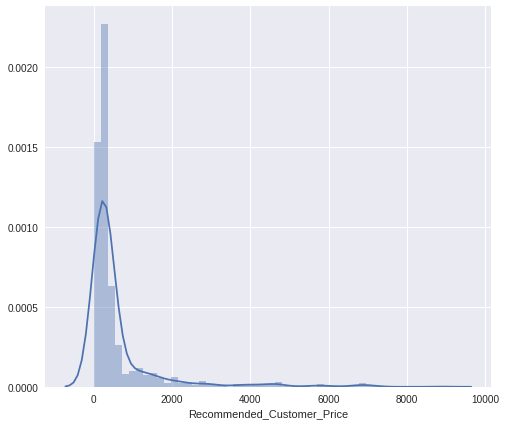

In [66]:
# discretizing price variable

sns.distplot(cpu_clean.Recommended_Customer_Price)

cpu_clean.Recommended_Customer_Price = pd.cut(cpu_clean.Recommended_Customer_Price, [0,400,800,1500,1e9], labels=['consumer', 'consumer_expensive', 'industry', 'extremely_expensive'])

cpu_clean.Recommended_Customer_Price.describe()

The distribution plot above, as well as some domain expertise, was used to make somewhat informed guesses about what good cutoffs might be. The reasoning is that the spike near the low end is probably product for the average consumer driving the largest share of the market, while the little plateau between 400 and 2000 is probably a mixture of hobbyists/gamers and industry buyers. Anything beyond that is just insanity, only used for the highest-end industry or research applications.

In [67]:
categ_features = [
    'Recommended_Customer_Price',
    'Embedded_Options_Available',
    'Execute_Disable_Bit',
    'Intel_Hyper_Threading_Technology_',
    'Intel_64_',
    'Status',
    'Desktop',
    'Embedded',
    'Mobile',
    'Server',
    'Collection',
    '32-bit',
    '64-bit',
    'Itanium 64-bit',
    'nb_of_Cores',
    'nb_of_Threads']

num_features = ['Launch_Date',
                'TDP',
                'Max_nb_of_Memory_Channels',
                'Max_Memory_Size',
                'Bus_Speed',
                'Cache',
                'Processor_Base_Frequency']

And we'll go ahead and standardize our numerical features, then move on with the rest of the analysis.

## 3 Data Visualization and Analysis

First things first, we should get a feel for how correlated some of the features are to see if we can tease apart some relationships. All of this data should be looked at, however, noting that data was imputed using number of cores and product collection, so any correlations with those features in particular should be taken with a grain of salt.

### 3.1 General Description

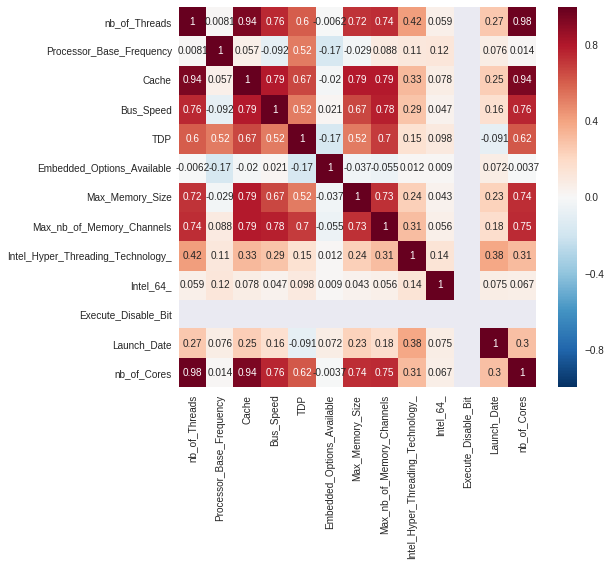

In [68]:
sns.heatmap(cpu_clean.corr(), annot=True)

Looking at the above heatmap, we see that number of Threads and Cores are, somewhat unsurprisingly, highly correlated and are also correlated with other features one would expect in a higher-end processor.

Somewhat surprisingly, base frequency does not have very many strong correlations with other measures of processor power. TDP, core numbers, and cache, however, appear to be highly correlated with some other important features.

Now, let's explore how certain variables are correlated. Let's start with comparing core numbers among price categories. 

### 3.2 Data Distributions

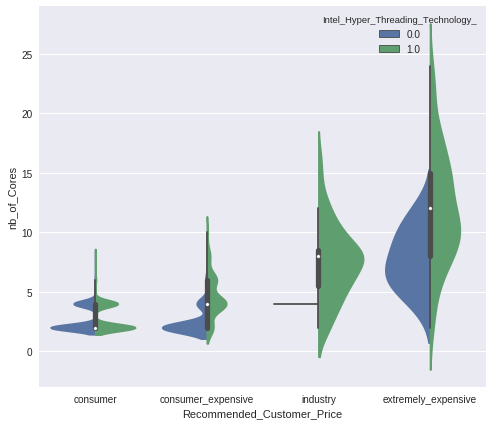

In [69]:
# violin plots are fun and informative

sns.violinplot(x='Recommended_Customer_Price', y='nb_of_Cores', hue='Intel_Hyper_Threading_Technology_', split=True, data=cpu_clean)

# maybe include counts of each group here

This plot contains some interesting insights into the data. Unsurprisingly, you can get CPUs with more cores the more money you pay. Additionally, this relationship is strongly heteroscedastic; the higher the price range, the more variable the number of cores is. This also makes sense, as there should still be very high-end CPUs with 8 or 10 cores, while we would not expect there to be any 24-core processors for \$200.

Another interesting point here is the correlation with Intel's Hyper-Threading Technology. There is almost no difference in core count between hyper-threaded and non-hyper-threaded CPUs at consumer-grade, but the difference increases the higher the price class goes. It's a little harder to say exactly why that is, but Hyper-Threading was designed for more industry-tier applications, so it stands to reason that more powerful processors would be associated with the presence of Hyper-Threading Technology.

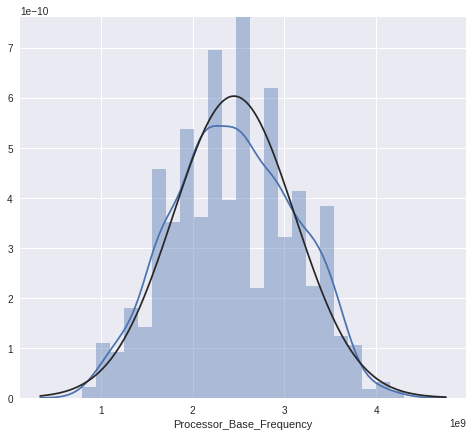

In [70]:
from scipy.stats import norm

sns.distplot(cpu_clean.Processor_Base_Frequency, fit=norm)

This histogram tells us some interesting things about our data. The first is that there is a fairly narrow band of clock speeds for the processors we're studying, with almost nothing getting above 4 GHz. The second is how normally-distributed the data is. Let's try making a Q-Q Plot of it for the sake of fun.

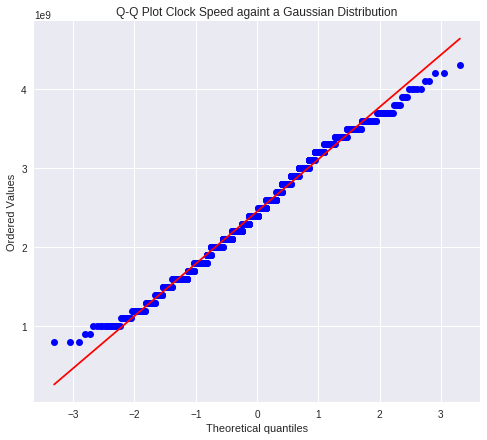

In [71]:
from scipy.stats import probplot

probplot(cpu_clean.Processor_Base_Frequency, dist=norm, plot=plt)
plt.title('Q-Q Plot Clock Speed againt a Gaussian Distribution')

plt.show()

It is kind of interesting that clock speed ends up being so close to normally-distributed. It may be that this is just how the demand for processors falls out; there are only a few applications for heavier- or lighter-duty CPUs, but many for average-speed processors, and the cost of producing them and supply falls off accordingly.

This is interesting, so we'll explore it a little further along different categorical variables.

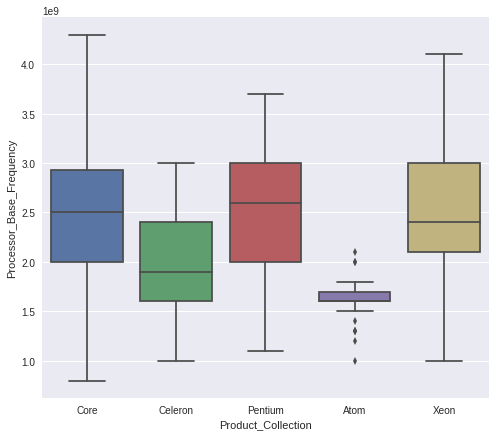

In [72]:
sns.boxplot(data=cpu_clean, x='Product_Collection', y='Processor_Base_Frequency')

So it appears that Core runs the gamut from very high-end to very lightweight processors. As one of Intel's main product lines that ranges from very lightweight with i3 to very heavyweight with i7, as well as processors for tablets, we can see how this might be the case. However, it is interesting and somewhat unexpected that Core's distribution has points higher than Xeon, a much more industry-focused series. This suggests that clock speed may not be all that important for the applications that Intel is making Xeon for.

Recommended_Customer_Price
consumer               6.923375e+08
consumer_expensive     6.028856e+08
industry               6.597359e+08
extremely_expensive    4.421498e+08
Name: Processor_Base_Frequency, dtype: float64


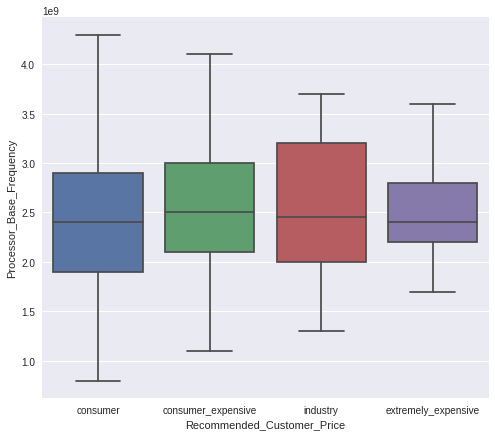

In [73]:
sns.boxplot(data=cpu_clean, x='Recommended_Customer_Price', y='Processor_Base_Frequency')

# let's get some exact numbers on the variance to go with the visualization

stdev_grps = cpu_clean.groupby('Recommended_Customer_Price')
print(stdev_grps.Processor_Base_Frequency.std())

This boxplot seems to show us that a good base frequency is important for higher-end applications, but much higher is not as important when the processor is likely going into a cluster or some larger server farm. And this seems to be a smooth trend, not just a sharp drop-off. The higher-end applications have less use for low-clock processors or very high-clock processors, whereas the average consumer or hobbyist may have more varied needs.

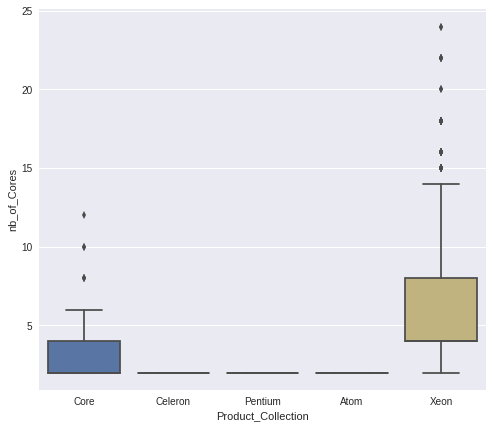

In [74]:
sns.boxplot(data=cpu_clean, x='Product_Collection', y='nb_of_Cores')

It appears as though most of the lower-end processor lines have almost no variation in core numbers, while Core and Xeon go much higher. 

For low-end processors or embedded systems, it stands to reason that the number of cores is not terribly important, and almost certainly not worth the increase in cost. On the other hand, processors that are going into servers or large clusters need more cores for larger, paralellized jobs, and in most of those applications, the increase in performance would likely be worth the increase in cost.

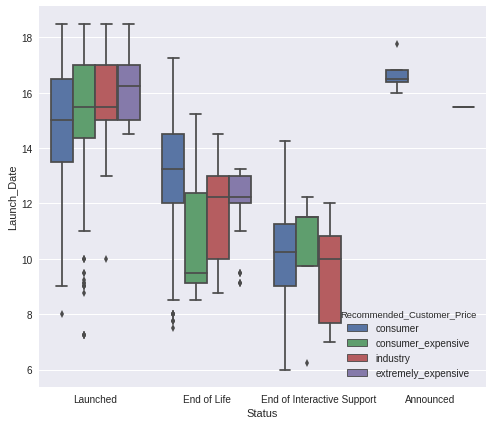

In [75]:
sns.boxplot(data=cpu_clean, x='Status', y='Launch_Date', hue='Recommended_Customer_Price')

This boxplot may be a bit hard to parse, but essentially what we have here is how each price range ages in support differently.

One particularly interesting note here is how much sooner consumer-grade processors hit end of life than processors in other price ranges. At median, Intel will stop producing them a whole 2 years earlier than other, more expensive processors.

Another point of interest is that the distribution of CPUs which are no longer supported is roughly the same, implying that it may simply be age, not demand, that causes them to lose support.

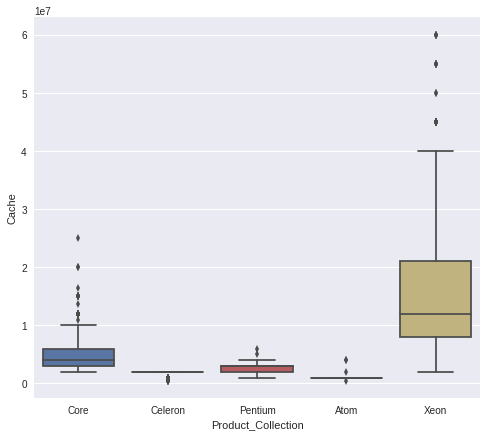

In [80]:
sns.boxplot(data=cpu_clean, x='Product_Collection', y='Cache')

[None]

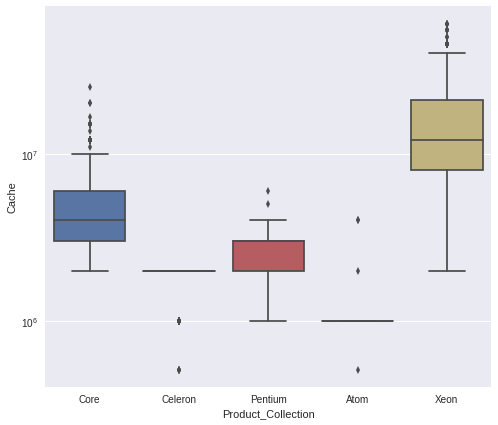

In [79]:
ax = sns.boxplot(data=cpu_clean, x='Product_Collection', y='Cache')

ax.set(yscale = 'log')

Cache, which is perhaps more important than clock speed for high-end performance, appears to be much higher in Xeon and higher-end Core processors. This is likely due to the fact that large amount of caches are mostly used for larger calculations, which are unnecessary on home-use or embedded CPU. Thus, it makes sense that Atom and Celeron, which are intended for such applications, wouldn't have much cache, but heavier-duty CPUs which Intel intends for use in computing clusters, would have much more use for more cache and a wider range of cache for a wider range of specific applications.

Let's now try breaking down Cache by price-grade.

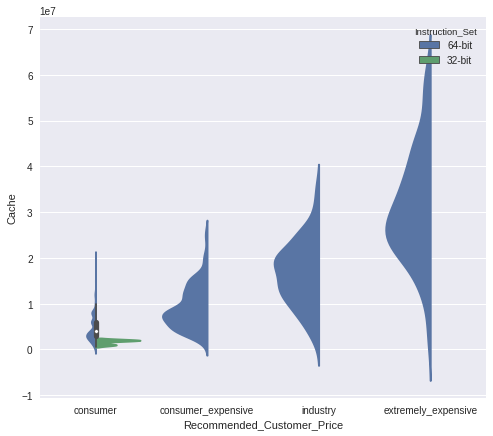

In [77]:
sns.violinplot(data=cpu_clean, x='Recommended_Customer_Price', y='Cache', hue='Instruction_Set', split=True)

Here we can see again what we've come to expect. Cache will climb in mean and variance steadily with price point, with the "extremely expensive" processors having a wide variety of CPUs with crazy amounts of it, useful for high-end computational tasks.

On a whim, instruction set was included as an extra categorical variable to examine in this visualization. Not having much use in high-end applications, 32-bit systems are only found in cheaper CPUs, for consumer use or in smaller, embedded systems.

We will now move on to another measure of processor power, thread numbers.

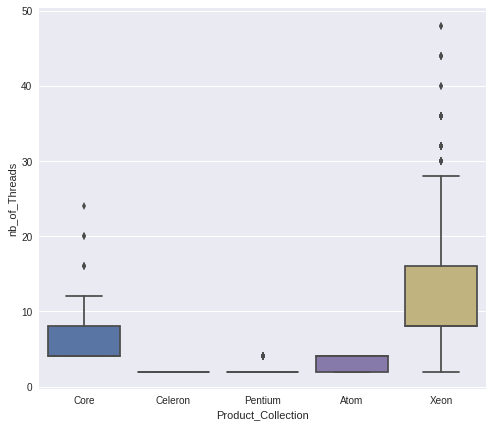

In [78]:
sns.boxplot(data=cpu_clean, x='Product_Collection', y='nb_of_Threads')

[None]

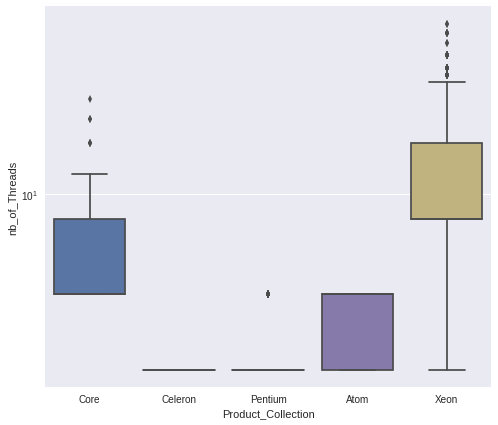

In [81]:
ax = sns.boxplot(data=cpu_clean, x='Product_Collection', y='nb_of_Threads')

ax.set(yscale = 'log')

The situation with Core and Xeon is one that has become commonplace at this point, however, one of the interesting points here is that Atom has a distribution with a much higher maximum than Celeron or Pentium. This is somewhat unexpected, but it may be explained by Intel trying to push Atom to serve higher-performance tablets, which could use more threads for higher-demand computational jobs, whereas Celeron and Pentium are generally used as cheaper alternatives for home use computers, which would not need more threads.

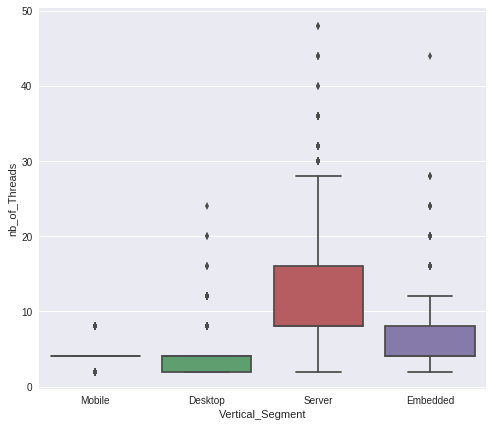

In [96]:
sns.boxplot(data=cpu_clean, x='Vertical_Segment', y='nb_of_Threads')

Unsurprisingly, processors designed for use in servers have the highest numbers of threads, by far. However, what is less expected is that the lowest median is desktop processors, behind mobile and embedded processors. 

This could be due to the fact that embedded processors with specific jobs may need to perform them in parallel, requiring more threads than one would need on an average desktop computer. Mobile processors, on the other hand, would almost certainly not have existed until fairly recently, when making processors with more threads would have been cheaper, even at that size, so it may have less historical data with fewer threads. We will check this hypothesis below.

We will also see later that thread number and core number line up almost exactly, as suggested by their linear correlation of 0.98, seen in the heatmap above, so much of the analysis on thread count here applies to cores as well.

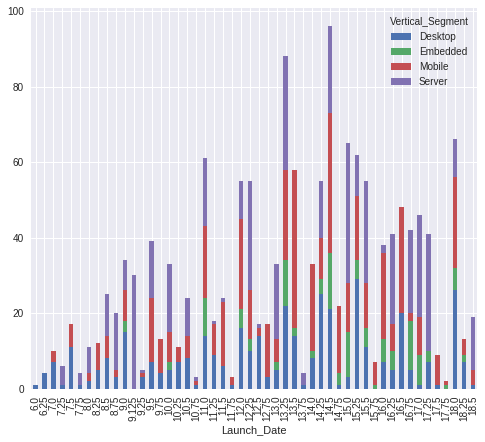

In [99]:
processor_types = pd.crosstab([cpu_clean.Launch_Date],
                             cpu_clean.Vertical_Segment)

processor_types.plot(kind='bar', stacked=True)

That hypothesis ended up not working out. In that case, the higher median thread count of mobile processors may be a bit harder to explain.

Now, we move on to another interesting view of CPU performance.

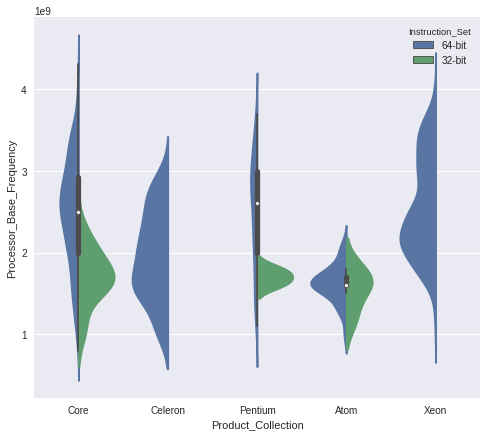

In [89]:
sns.violinplot(data=cpu_clean, x='Product_Collection', y='Processor_Base_Frequency', hue='Instruction_Set', split=True)

Now this is a fun plot. We are once again looking at clock speed, this time across product lines and instruction sets. Interestingly, the more everyday processors, Core and Pentium, tend to have higher variance in their clock speeds with means that are fairly middle of the road.

Xeon, on the other hand, looks to have a sort of bimodal distribution, with perhaps one of its peaks for regular server usage, and the higher one intended for use in larger computing clusters. This may also betray some of the complexity that is lost when grouping processors strictly by product line, not taking into account the generation or specific collection.

Another interesting point is the difference between the 32-bit and 64-bit systems. Almost all of them have the same clock speed, around 1.8 GHz, which is considerable less than the 64-bit processors. The only exception is Atom processors, where they have roughly the same mean. This could be due to the fact that in smaller processors there is less room for variation in clock speed to begin with, or just that Atom has a lower average clock speed, which happens to be around that of 32-bit systems.

Now we will move on to discussing relationships between numerical features.

### 3.3 Correlations Between Numerical Features

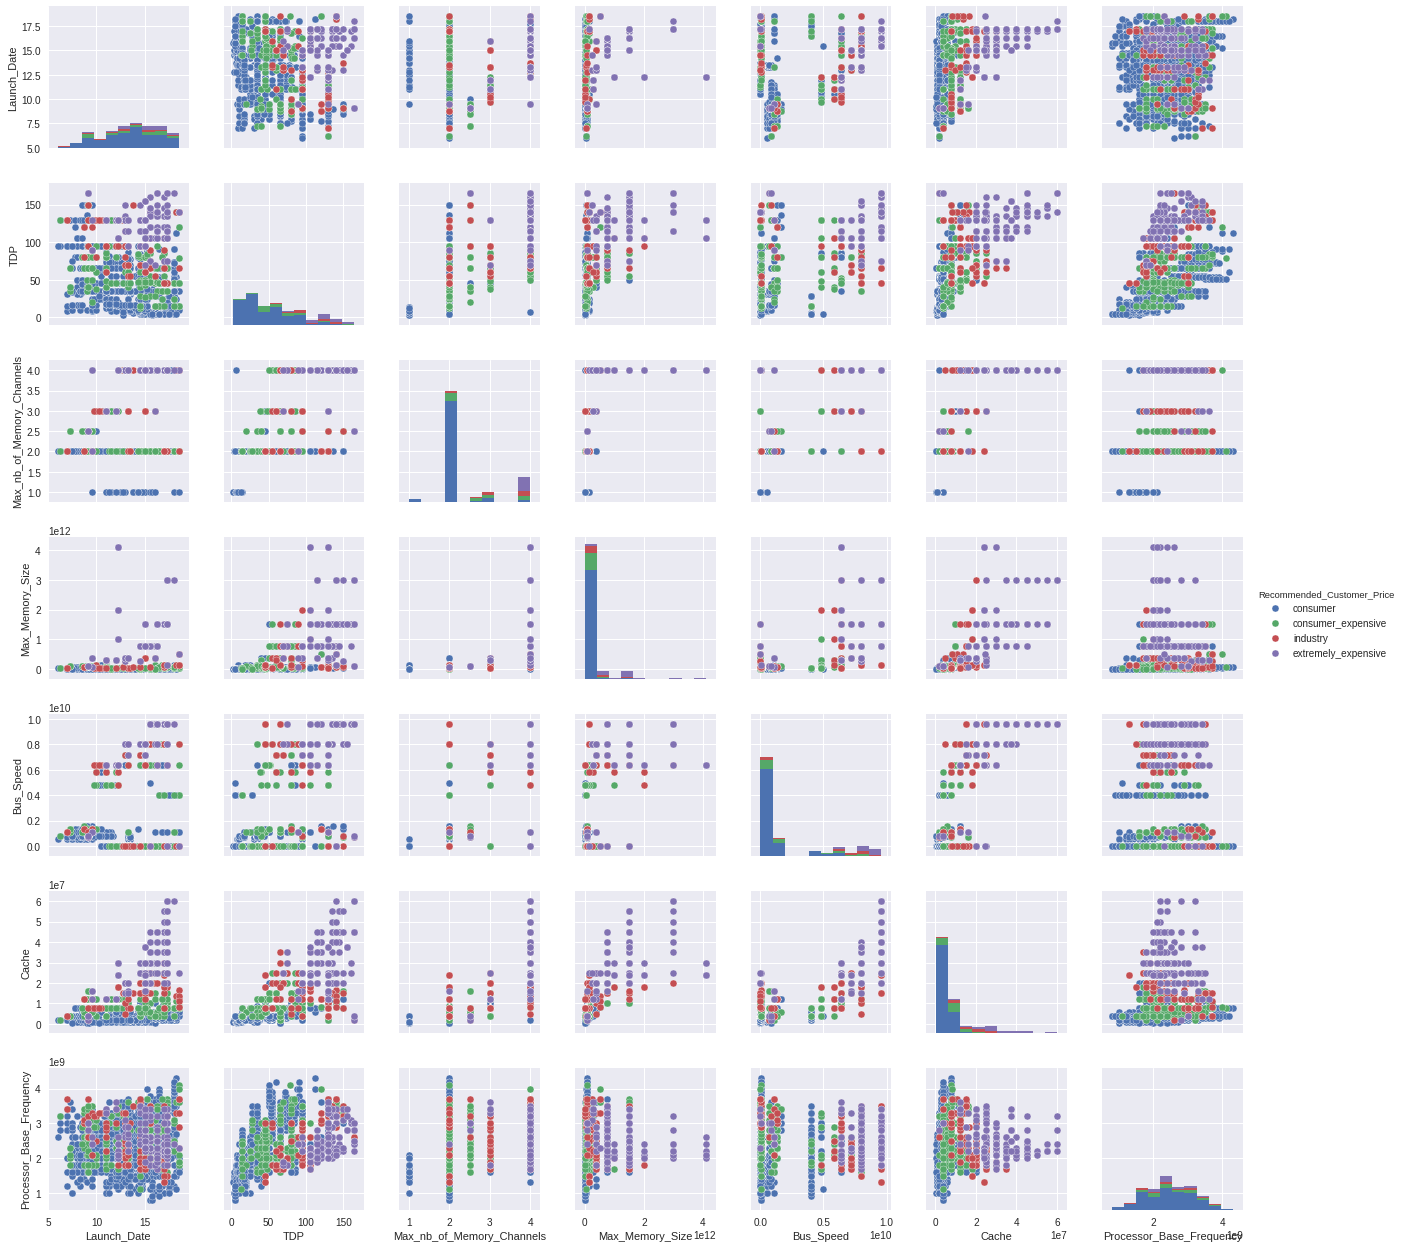

In [34]:
sns.pairplot(data=cpu_clean, vars=num_features, hue='Recommended_Customer_Price')

Much of this pairplot is not terribly useful, as much of the data is "pseudo-categorical" with a relatively small number of discrete values, but there are a few useful relationships that we can draw up between some of the numerical features. Adding jitter is a possibility, but is a partial solution at best, and there is already a lot of understanding to be gained here.

For example, TDP and clock speed appear to be roughly correlated, with what may appear at surface level to be a roughly logarithmic relation. Also, the much higher price-point processors tend to dominate the others in features like Cache at TDP even for similar values of other variables. Other features that appear roughly correlated are launch date and cache as well as bus speed and clock speed. Let's pull a couple of these out and look at them in more depth.

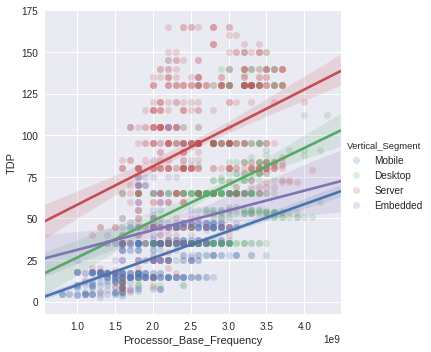

In [100]:
sns.lmplot(data=cpu_clean, x='Processor_Base_Frequency', y='TDP', hue='Vertical_Segment', scatter_kws={'alpha':0.2})

According to this plot, for each class of processor price, TDP grows at almost the same rate with clock speed, but there are different intercept values. 

It is obvious that a processor with a higher clock speed would generate more heat, and it makes sense that this value might scale similarly among processors designed for different appliacations, but it is not entirely clear why they would have different base values. One possible explanation is the varying numbers of cores generating more heat or their design for different applications. A CPU in a server is going to have better cooling conditions than is a tiny CPU in a phone.

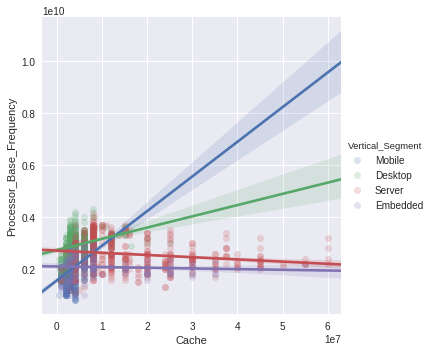

In [106]:
sns.lmplot(data=cpu_clean, x='Cache', y='Processor_Base_Frequency', hue='Vertical_Segment', scatter_kws={'alpha':0.2})

As we saw earlier, the variance in cache decreases for higher-end applications, and here we can see that it does that mostly independently of clock speed. What is particularly interesting here is the differences in slope values across application. It stands to reason that server CPUs would need to have a fairly consistent clock speed, regardless of how much caching memory they have. In that case, cache is the more relevant measure of power for the application.

However, in the case of mobile or desktop processors, where clock speed is not as constant among products, it can be a more relevant measure of performance, and thus could be more correlated with cache.

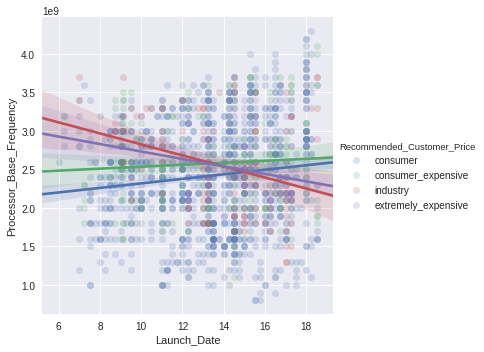

In [37]:
sns.lmplot(data=cpu_clean, x='Launch_Date', y='Processor_Base_Frequency', hue='Recommended_Customer_Price', scatter_kws={'alpha':0.2})

This data is a bit busy, and the lines produced by regression don't appear to be much different from constant. This shouldn't come as too much of a surprise, as the heatmap produced earlier showed a a linear correlation value of $0.076$, not far off from zero.

This is actually somewhat surprising, as it seems to suggest that, on average, processors have not increased in clock speed since data for this dataset has been collected, which was around the start of the century. This could be explained by the rise of portable and wearable devices driving demand for lightweight processors, and cloud computing obviating the need for everyone to have a heavy-duty processor. It could also be that there is not much of a push to drive up clock speed or that there are limits imposed by the instruction set that is being used.

Let's try some similar plots with other, possibly more relevant features.

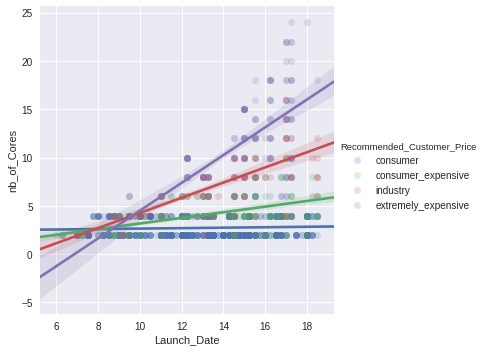

In [38]:
sns.lmplot(data=cpu_clean, x='Launch_Date', y='nb_of_Cores', hue='Recommended_Customer_Price', scatter_kws={'alpha':0.2})

So, indeed, it has gotten more feasible to put more cores in a processor as time has gone on. However, as the technology has improved, more specialized and more expensive processors have grown much more rapidly, whereas the average consumer product has not improved as drastically, perhaps because it has hit a certain threshold of usefulness given the tasks it might be put to work performing, whereas it is more critical for, say, processors in a research computing cluster, to imrove and stay ahead of the curve.

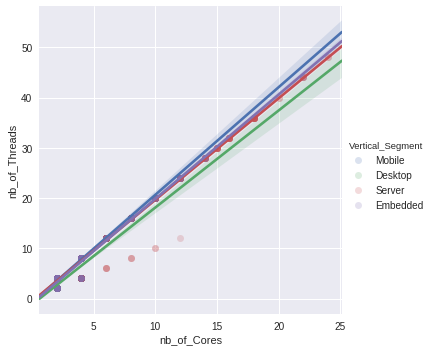

In [104]:
sns.lmplot(data=cpu_clean, x='nb_of_Cores', y='nb_of_Threads', hue='Vertical_Segment', scatter_kws={'alpha':0.2})

This plot is mostly to visually confirm something that is already known with near certainty. Earlier, the heatmap showed us that number of cores and number of threads have nearly perfect linear correlation, and experience with CPUs and basic knowledge of their inner workings tells us that this should almost always be the case.

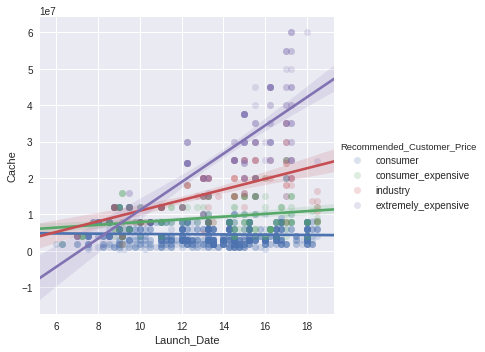

In [41]:
sns.lmplot(data=cpu_clean, x='Launch_Date', y='Cache', hue='Recommended_Customer_Price', scatter_kws={'alpha':0.2})

This plot says much the same thing that the earlier plot comparing launch date against number of cores has said. Essentially, for higher-end CPUs performing heavier-load jobs that may have to be parallelized, having more cache is more important. And with computing hardware improving as rapidly as it does, it is important for those high-end processors to stay on top of the improving hardware, where it is less critical for regular users to keep up with the very latest in CPU technology.

## 4 t-SNE Time

The purpose of t-SNE is to find low-dimensional manifolds embedded in higher dimensions and reduce them down to a form that is easily visualized in two or three dimensions. This is achieved using a similarity score between each point and each other point in the dataset. The similarity score is the value of a t-distribution centered on one of the points, as follows: 

$$q_{ij} = \frac{(1+\|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l}(1 + \|y_k - y_l\|^2)^{-1}}$$

This is figured for both the high-dimensional raw data ($p_{ij}$) and for its low-dimensional representation ($q_ij$), and a stochastic gradient descent algorithm is used to adjust the low-dimensional representation to minimize their Kullback-Leibler divergence, which is calculated as:

$$KL(P\|Q) = \sum_i \sum_j p_{ij} log(\frac{p_{ij}}{q_{ij}})$$

Intuitively, this has the effect of pulling together close neighbors in the high dimensional space and causing them to cluster in the low-dimensional space to be easily identifiable by humans for visualization.

t-SNE was developed to solve some of the problems with standard SNE by using a t-distribution with 1 degree of freedom instead of a Gaussian. This both makes the gradient easier to calculate and solves the "crowding problem" with SNE, wherein large numbers of roughly equidistant points in higher dimensions will collapse in $2$ or $3$ because there are fewer arrangements in lower dimensions that can accomodate them, and the probability distribution will "exert" an attractive "force" on each of the data points. Using a t-distribution fixes this, as it has a heavier tail, which keeps the datapoints more distant.

In [42]:
# first, scale numerical features

def standardize(feat, mu, sigma):
    return (feat - mu)/sigma

for feat in num_features:
    cpu_clean[feat] = (cpu_clean[feat] - cpu_clean[feat].mean()) / cpu_clean[feat].std()
    
cpu_clean.describe()

/usr/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


nb_of_Threads  Processor_Base_Frequency        Cache    Bus_Speed  \
count    1495.000000              1.495000e+03  1495.000000  1495.000000   
mean        7.416722              3.374484e-16     0.000000     0.000000   
std         7.053600              1.000000e+00     1.000000     1.000000   
min         2.000000             -2.495551e+00    -0.845311    -0.621133   
25%         4.000000             -6.825525e-01    -0.578475    -0.619474   
50%         4.000000             -7.821967e-02    -0.256728    -0.618479   
75%         8.000000              6.771964e-01    -0.042230    -0.178922   
max        48.000000              2.792361e+00     5.534727     2.563583   

                TDP  Embedded_Options_Available  Max_Memory_Size  \
count  1.495000e+03                 1495.000000     1.495000e+03   
mean  -1.140671e-16                    0.199331     1.901118e-17   
std    1.000000e+00                    0.399631     1.000000e+00   
min   -1.470723e+00                    0.000000    -4.265997e-01   
25%   -6.592806e-01                    0.000000    -3.968857e-01   
50%   -2.535595e-01                    0.000000    -3.663950e-01   
75%    6.085977e-01                    0.000000    -2.574438e-01   
max    2.637203e+00                    1.000000     7.534019e+00   

       Max_nb_of_Memory_Channels  Intel_Hyper_Threading_Technology_  \
count               1.495000e+03                        1495.000000   
mean                7.604471e-17                           0.602676   
std                 1.000000e+00                           0.489508   
min                -1.804642e+00                           0.000000   
25%                -5.031757e-01                           0.000000   
50%                -5.031757e-01                           1.000000   
75%                 1.475576e-01                           1.000000   
max                 2.099757e+00                           1.000000   

         Intel_64_  Execute_Disable_Bit   Launch_Date  nb_of_Cores  
count  1495.000000               1495.0  1.495000e+03  1495.000000  
mean      0.987960                  1.0 -3.041788e-16     4.065552  
std       0.109101                  0.0  1.000000e+00     3.386284  
min       0.000000                  1.0 -2.566031e+00     2.000000  
25%       1.000000                  1.0 -7.698493e-01     2.000000  
50%       1.000000                  1.0  1.710077e-01     2.000000  
75%       1.000000                  1.0  6.842024e-01     4.000000  
max       1.000000                  1.0  1.710592e+00    24.000000

In [43]:
from sklearn.manifold import TSNE

cpu_num = cpu_clean.loc[:,num_features]

cpu_manifold = TSNE(n_components=3, learning_rate=300).fit_transform(cpu_num)

In [44]:
import plotly.offline as py

py.init_notebook_mode()

from plotly.graph_objs import Scatter3d, Marker, Layout, XAxis, YAxis

In [45]:
py.iplot( {
    'data': [
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer' ,2],
            mode='markers',
            name='consumer',
            marker=Marker(
                size=4,
                color='red',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'consumer_expensive' ,2],
            mode='markers',
            name='consumer_expensive',
            marker=Marker(
                size=4,
                color='blue',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'industry' ,2],
            mode='markers',
            name='industry',
            marker=Marker(
                size=4,
                color='light green',
                opacity=0.2
            )
        ),
        
        Scatter3d(
            x=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,0],
            y=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,1],
            z=cpu_manifold[cpu_clean.Recommended_Customer_Price == 'extremely_expensive' ,2],
            mode='markers',
            name='extremely_expensive',
            marker=Marker(
                size=4,
                color='black',
                opacity=0.2
            )
        )
    ],
    
    'layout': Layout(
        xaxis = XAxis(),
        yaxis = YAxis(),
        title = 't-SNE Embedded Manifold, Colored by Price Range',
        showlegend = True
    )
}
)

Before discussing the results of this visualization, it is worth noting two things about t-SNE:

1. Because t-SNE only cares about proximity of datapoints to each other when translating them to fewer dimensions and does not take into account absolute position, the actual location of these points, and other aspects of the manifolds (shape, orientation, even proximity to other manifolds) don't actually provide useful information. We should really only be looking at what the clusters are.
2. t-SNE is fairly accurate when translating embedded low-dimensional manifolds, but even in the paper where it was proposed, the authors acknowledge that sometimes it will put points in clusters that they really shouldn't be in. A few "outlier" points in a certain cluster that is dominated by one or two other classes shouldn't affect our analysis.

Now, let's get data-sciency.

The above scatterplot tells us a couple of interesting things about our data. The first is that the "industry" and the "extremely expensive" CPUs almost always cluster together, without much interaction with the other datapoints from other classes, with the exception of sometime industry-priced processors. Note in particular the small clusters near the -y,-z end of the data and the small, densely-packed blobs of green strewn about.

Also, the "consumer" processors tend to clump together and make up a large majority of the dataset. On the other hand, the "consumer expensive" datapoints are scattered about and dominate very few cluster. This may indicate that we have discretized the price data poorly, such that it might be more accurate to draw the divisions differently. However, many of the other classes seem to be separated with some fidelity to actual clumpings in higher dimensions.

Let's now look at the data colored by a different feature.

In [46]:
py.iplot( {
    'data': [
        Scatter3d(
            x=cpu_manifold[:,0],
            y=cpu_manifold[:,1],
            z=cpu_manifold[:,2],
            mode='markers',
            marker=Marker(
                size=4,
                color=cpu_clean.nb_of_Cores,
                colorscale='Viridis',
                opacity=0.2,
                showscale=True
            )
        ),
    ],
    
    'layout': Layout(
        xaxis = XAxis(),
        yaxis = YAxis(),
        title = 't-SNE Embedded Manifold, Colored by Number of Cores',
        showlegend = False
    )
}
)

If we compare the colorings of the manifolds in this plot with their colorings in the previous plot, we should not be surprised to see that many of the clusters dominated by "consumer" CPUs are now very dark, indicating 2, 4, or 8 cores, and the primarily "industry" and "extremely expensive" clusters are very yellow and green.

Also, looking at this plot compared to the previous plot reinforces the idea that there might not actually be that much of a difference between the "consumer" and "consumer expensive" categories. 

Other than that, there isn't too much else to be gained from looking at this plot. Powerful processors tend to be close to other powerful processors along similar axes in high-dimensional space, which is what we've come to expect.

This work and understanding of t-SNE comes from "Visualizing Data using t-SNE" by Van der Maaten and Hinton in the Journal of Machine Learning Research (2008), which can be accessed [here](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).